### Importing Libraries

In [59]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re ##regular expression library .
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Reading the data

In [60]:
train=pd.read_csv('tweets_train.csv')
test= pd.read_csv('tweets_test.csv')

In [61]:
train.head(15)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1
8,8,ablaze,"Accra, Ghana","National Security Minister, Kan Dapaah's side ...",0
9,9,ablaze,Searching,This creature who’s soul is no longer clarent ...,0


In [62]:
train.shape

(7979, 5)

### EDA

C:\Users\hp\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

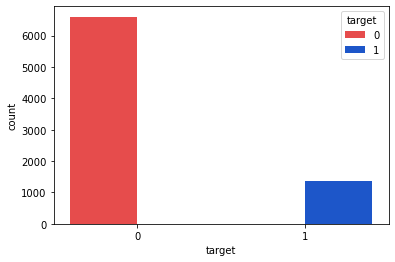

In [63]:
pipfig = plt.figure()
sns.countplot(train['target'],  hue=train['target'],palette= ["#ff3333","#004de6"])

In [64]:
text_len=train[train['target']==1]['text'].str.len().max()
print(f'The maxmum length of disaster tweets:',text_len)

The maxmum length of disaster tweets: 147


In [65]:
text_len=train[train['target']==0]['text'].str.len().max()
print(f'The maxmum length of NOT disaster tweets:',text_len)

The maxmum length of NOT disaster tweets: 148


### Target Analysis

In [66]:
avg_disaster=train[train['target']==1]['target'].count()
print(f'The average of disaster tweets:',avg_disaster/100,'%')

The average of disaster tweets: 13.76 %


In [67]:
avg_disaster=train[train['target']==0]['target'].count()
print(f'The average of not disaster tweets:',avg_disaster/100,'%')

The average of not disaster tweets: 66.03 %


In [68]:
train['T_mean'] = train.groupby('keyword')['target'].mean()

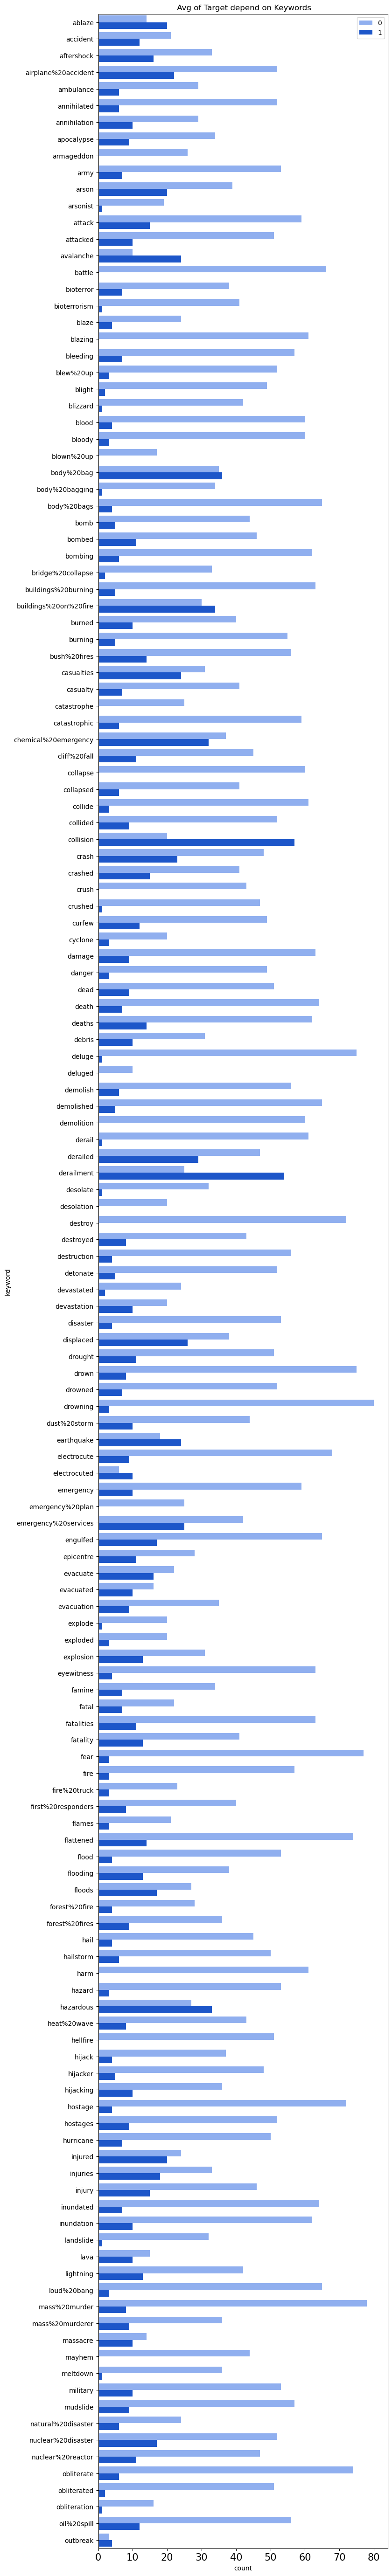

In [19]:
fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train.sort_values(by='T_mean', ascending=True)['keyword'],
              hue=train.sort_values(by='T_mean', ascending=True)['target'] ,  palette= ["#80aaff","#004de6"])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=10)
plt.legend(loc=1)
plt.title(' Avg of Target depend on Keywords')

plt.show()
fig.savefig('Avg of Target depend on Keywords.png')

In [20]:
train.drop(columns=['T_mean'], inplace=True)

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
train['length'] = train['text'].apply(lambda x: len(word_tokenize(x)))
train

,id,keyword,location,text,target,length
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,23
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,26
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,9
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,12
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,28
...,...,...,...,...,...,...
7974,7974,outbreak,Philippines,"In a statement, it said ""evidence is highly su...",1,21
7975,7975,outbreak,NaN,Mystery China Pneumonia Outbreak Likely Caused...,1,14
7976,7976,outbreak,NaN,Just a few weeks back we were shocked with a n...,1,32
7977,7977,outbreak,Barcelona,Check out “Pandemic: How to Prevent an Outbrea...,0,19


In [24]:
train[train.target == 0 ]

,id,keyword,location,text,target,length
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,28
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0,26
8,8,ablaze,"Accra, Ghana","National Security Minister, Kan Dapaah's side ...",0,22
9,9,ablaze,Searching,This creature who’s soul is no longer clarent ...,0,22
11,11,ablaze,NaN,Social media went bananas after Chuba Hubbard ...,0,21
...,...,...,...,...,...,...
7970,7970,oil%20spill,"A cave somewhere, probably",Really helps me feel seen with my oil spill ra...,0,14
7971,7971,oil%20spill,NaN,Oysters have been in short supply because of e...,0,22
7972,7972,outbreak,NaN,#HongKong reporters covering Wuhan pneumonia o...,0,17
7973,7973,outbreak,NaN,Hi Michael. I'm BB. I'm very angry that you an...,0,25


In [25]:
train[train.target == 1]

,id,keyword,location,text,target,length
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,23
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,26
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,9
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,12
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,24
...,...,...,...,...,...,...
7967,7967,oil%20spill,"Queensland, Australia",We have reports of an Oil Spill on Mount Crosb...,1,26
7974,7974,outbreak,Philippines,"In a statement, it said ""evidence is highly su...",1,21
7975,7975,outbreak,NaN,Mystery China Pneumonia Outbreak Likely Caused...,1,14
7976,7976,outbreak,NaN,Just a few weeks back we were shocked with a n...,1,32


In [26]:
train.drop(columns=['length'], inplace=True)

### Preparing the data

In [28]:
print("missing values: Training set")
missing_values = train.isna().sum()
missing_values

missing values: Training set


id             0
keyword        0
location    2371
text           0
target         0
dtype: int64

In [29]:
print("missing values: testing set")
missing_values = test.isna().sum()
missing_values

missing values: testing set


id             0
keyword        0
location    1047
text           0
target         0
dtype: int64

In [30]:
for df in [train , test]:
    for e in ['keyword', 'location']:
        df[e] = df[e].fillna('No_data')

### Preprocessing :

In [31]:
nltk.download('wordnet')
nltk.download('stopwords')
stoplist = set(stopwords.words('english'))

test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
test.head()
train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
train.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,id,keyword,location,text,target
0,0,ablaze,No_data,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,No_data,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,No_data,"""Lord Jesus, your love brings freedom and pard...",0


In [73]:
def Clean(text):
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text) #remove URL
    
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>') #remove special character 
    
    text = re.sub(r"(?:\@)\w+", '', text)
    text=text.encode("ascii",errors="ignore").decode()
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
   
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text=" ".join(text.split())
    return text

def stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [74]:
train['text']=train['text'].apply(lambda x: Clean(x))
test['text']=test['text'].apply(lambda x: Clean(x))

In [75]:
train['text']

0       Communal violence in Bhainsa Telangana Stones ...
1       Telangana Section 144 has been imposed in Bhai...
2                 Arsonist sets cars ablaze at dealership
3                 Arsonist sets cars ablaze at dealership
4       Lord Jesus your love brings freedom and pardon...
                              ...                        
7974    In a statement it said evidence is highly sugg...
7975    Mystery China Pneumonia Outbreak Likely Caused...
7976    Just a few weeks back we were shocked with a n...
7977    Check out Pandemic How to Prevent an Outbreak ...
7978    In a statement it said evidence is highly sugg...
Name: text, Length: 7979, dtype: object

### Tokenizing 

In [34]:
train['text_tokens'] = train['text'].apply(lambda x: word_tokenize(x))
test['text_tokens']  = train['text'].apply(lambda x: word_tokenize(x))
train.head()

,id,keyword,location,text,target,text_tokens
0,0,ablaze,No_data,Communal violence in Bhainsa Telangana Stones ...,1,"[Communal, violence, in, Bhainsa, Telangana, S..."
1,1,ablaze,No_data,Telangana Section 144 has been imposed in Bhai...,1,"[Telangana, Section, 144, has, been, imposed, ..."
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership,1,"[Arsonist, sets, cars, ablaze, at, dealership]"
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership,1,"[Arsonist, sets, cars, ablaze, at, dealership]"
4,4,ablaze,No_data,Lord Jesus your love brings freedom and pardon...,0,"[Lord, Jesus, your, love, brings, freedom, and..."


In [36]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [80]:
train['text_tokens']=train['text'].apply(lambda x: stemmer(x))
test['text_tokens']=test['text'].apply(lambda x: stemmer(x))

train['text_tokens']=train['text'].apply(lambda x: lemmatizer(x))
test['text_tokens']=test['text'].apply(lambda x: lemmatizer(x))

In [84]:
train['text']

0       Communal violence in Bhainsa Telangana Stones ...
1       Telangana Section 144 has been imposed in Bhai...
2                 Arsonist sets cars ablaze at dealership
3                 Arsonist sets cars ablaze at dealership
4       Lord Jesus your love brings freedom and pardon...
                              ...                        
7974    In a statement it said evidence is highly sugg...
7975    Mystery China Pneumonia Outbreak Likely Caused...
7976    Just a few weeks back we were shocked with a n...
7977    Check out Pandemic How to Prevent an Outbreak ...
7978    In a statement it said evidence is highly sugg...
Name: text, Length: 7979, dtype: object

In [83]:
train['text_tokens']


0       [C, o, m, m, u, n, a, l,  , v, i, o, l, e, n, ...
1       [T, e, l, a, n, g, a, n, a,  , S, e, c, t, i, ...
2       [A, r, s, o, n, i, s, t,  , s, e, t, s,  , c, ...
3       [A, r, s, o, n, i, s, t,  , s, e, t, s,  , c, ...
4       [L, o, r, d,  , J, e, s, u, s,  , y, o, u, r, ...
                              ...                        
7974    [I, n,  , a,  , s, t, a, t, e, m, e, n, t,  , ...
7975    [M, y, s, t, e, r, y,  , C, h, i, n, a,  , P, ...
7976    [J, u, s, t,  , a,  , f, e, w,  , w, e, e, k, ...
7977    [C, h, e, c, k,  , o, u, t,  , P, a, n, d, e, ...
7978    [I, n,  , a,  , s, t, a, t, e, m, e, n, t,  , ...
Name: text_tokens, Length: 7979, dtype: object

In [40]:
train['text'][5]

'If this child was Chinese this tweet would have gone viral Social media would be ablaze SNL would have made a racist j'

In [41]:

test['text'][3260]

'The forgotten nasty wreck between Landon Cassill and Jeffery Earnhardt at the Brickyard in 2018'

In [42]:
train['text_tokens'][7]

['A',
 's',
 'a',
 'n',
 's',
 'o',
 'l',
 ' ',
 'A',
 ' ',
 'B',
 'J',
 'P',
 ' ',
 'o',
 'f',
 'f',
 'i',
 'c',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'S',
 'a',
 'l',
 'a',
 'n',
 'p',
 'u',
 'r',
 ' ',
 'v',
 'i',
 'l',
 'l',
 'a',
 'g',
 'e',
 ' ',
 'w',
 'a',
 's',
 ' ',
 's',
 'e',
 't',
 ' ',
 'a',
 'b',
 'l',
 'a',
 'z',
 'e',
 ' ',
 'l',
 'a',
 's',
 't',
 ' ',
 'n',
 'i',
 'g',
 'h',
 't',
 ' ',
 'B',
 'J',
 'P',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'a',
 'l',
 'l',
 'e',
 'g',
 'e',
 'd',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'T',
 'M',
 'C',
 ' ',
 'i',
 's',
 ' ',
 'b',
 'e',
 'h',
 'i',
 'n',
 'd',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'i',
 'n',
 'c',
 'i',
 'd',
 'e',
 'n',
 't',
 ' ',
 'P',
 'o',
 'l',
 'i',
 'c',
 'e',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'b']

In [43]:
test['text_tokens'][7]

['i',
 ' ',
 'c',
 'a',
 'n',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'r',
 'e',
 'm',
 'e',
 'm',
 'b',
 'e',
 'r',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'o',
 'u',
 't',
 'b',
 'r',
 'e',
 'a',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 's',
 'u',
 'b',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'd',
 'o',
 'm',
 ' ',
 'r',
 'e',
 'l',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 'h',
 'i',
 'p',
 's',
 ' ',
 'i',
 'n',
 ' ',
 'j',
 'a',
 'n',
 'u',
 'a',
 'r',
 'y',
 ' ',
 'l',
 'a',
 's',
 't',
 ' ',
 'y',
 'e',
 'a',
 'r',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 'E',
 'v',
 'e',
 'r',
 'y',
 'o',
 'n',
 'e',
 ' ',
 'u',
 's',
 'e',
 'd',
 ' ',
 't',
 'o',
 ' ',
 't',
 'y',
 'p',
 'e',
 ' ',
 'l',
 'i',
 'k',
 'e',
 ' ',
 't',
 'h',
 'i',
 's']

### Spliting data:

In [44]:
feature=train['text']
target =train['target']

X_train, X_test, Y_train, Y_test = train_test_split(feature,target,test_size = 0.2,random_state =24)

In [45]:
X_train

3157    NirbhayaCase SC dismisses curative petition of...
3429    My first experience of environmental activism ...
3228    So can someone explain weith most road deaths ...
4375    DRIP OR DROWN AFTER SO MANY PAGES DELETED I RE...
1551    Bruh it just randomly thundered out of knowwhe...
                              ...                        
3473    We saw lots of litter around Ushaka beach albe...
343     Images bibliques Apocalypse 2134 LeChrist LeSe...
6336    Those who claim current heat wave is unprecede...
899      My shadow keeps on growing in this blazing light
4514    SBWL Hanging around creatives beautiful minds ...
Name: text, Length: 6383, dtype: object

### Modeling:

Vectorizng and fiting the data:
vectorizer : it will do all three steps at once. Under the hood, it computes the word counts, IDF values, and TF-IDF scores all using the same data set
transformer: it will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency values and only then compute the TFIDF scores.

In [46]:
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b' ,ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(X_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
trainfeature = tfidf.fit_transform(vectorized)

In [48]:
TFIDF= TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1,1),
                       max_features=11000, 
                       norm='l2',
                       sublinear_tf=True)

In [49]:
TrainFeat_= TFIDF.fit_transform(X_train)

In [50]:
TestFeat_ = TFIDF.transform(X_test)

### bulid and test the model:

In [51]:
classifier = MultinomialNB()
classifier.fit(TrainFeat_,Y_train)

test_pred= classifier.predict(TestFeat_)
accuracy = accuracy_score(Y_train, classifier.predict(TrainFeat_))
accuracy

0.8839103869653768

In [52]:
testing_accuracy = accuracy_score(Y_test, test_pred)
testing_accuracy

0.8383458646616542

In [53]:
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1296
           1       0.96      0.15      0.25       300

    accuracy                           0.84      1596
   macro avg       0.90      0.57      0.58      1596
weighted avg       0.86      0.84      0.79      1596



<AxesSubplot:>

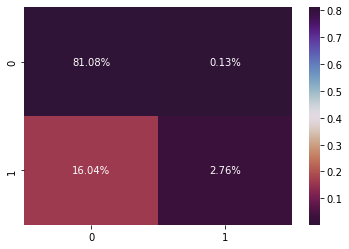

In [54]:
sns.heatmap(confusion_matrix(Y_test, test_pred)/np.sum(confusion_matrix(Y_test, test_pred)),annot=True, fmt='.2%', cmap='twilight_shifted_r')

In [55]:
tvectorizer=TFIDF.transform( train['text']).toarray()
last_predi = classifier.predict(tvectorizer)

results    = pd.DataFrame()

results['id'] = train['id']
results['target'] = last_predi

In [56]:
results

,id,target
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
7974,7974,0
7975,7975,0
7976,7976,0
7977,7977,0
